In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("data.csv",nrows=500)
print(data.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [27]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          500 non-null    float64
 1   bedrooms       500 non-null    float64
 2   bathrooms      500 non-null    float64
 3   sqft_living    500 non-null    int64  
 4   sqft_lot       500 non-null    int64  
 5   floors         500 non-null    float64
 6   waterfront     500 non-null    int64  
 7   view           500 non-null    int64  
 8   condition      500 non-null    int64  
 9   sqft_above     500 non-null    int64  
 10  sqft_basement  500 non-null    int64  
 11  yr_built       500 non-null    int64  
 12  yr_renovated   500 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 50.9 KB
None


In [23]:
data.drop(["date",'street','city','statezip','country'],axis=1,inplace=True ,errors="ignore")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          500 non-null    float64
 1   bedrooms       500 non-null    float64
 2   bathrooms      500 non-null    float64
 3   sqft_living    500 non-null    int64  
 4   sqft_lot       500 non-null    int64  
 5   floors         500 non-null    float64
 6   waterfront     500 non-null    int64  
 7   view           500 non-null    int64  
 8   condition      500 non-null    int64  
 9   sqft_above     500 non-null    int64  
 10  sqft_basement  500 non-null    int64  
 11  yr_built       500 non-null    int64  
 12  yr_renovated   500 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 50.9 KB
None


In [17]:
missing_values = data.isnull().sum()
print(missing_values)

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64


In [29]:
X=data.drop('price',axis=1)
y=data['price']

In [31]:
#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.4,random_state=0)

In [35]:
#train the model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 60679626067.65848


In [47]:
# Display the first few predicted values
print("Predicted values:", y_pred[:10])  # Shows the first 10 predicted prices

# Combine actual and predicted values in a DataFrame for comparison
predictions = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(predictions.head(10))  # Shows the first 10 rows of actual vs predicted prices


Predicted values: [794654.2684686  542617.22059133 449195.63322144 180912.65773388
 781255.09324476 263698.81768718 415022.05011913 393435.2488534
 599410.56790045 333078.84299779]
     Actual      Predicted
0  800866.0  794654.268469
1  535000.0  542617.220591
2  339950.0  449195.633221
3  325000.0  180912.657734
4  800000.0  781255.093245
5  242500.0  263698.817687
6  615000.0  415022.050119
7  372500.0  393435.248853
8  488000.0  599410.567900
9  353000.0  333078.842998


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 60679626067.65848
Root Mean Squared Error (RMSE): 246332.3488047367
Mean Absolute Error (MAE): 158893.44497205366


In [51]:
# Show all predictions vs actual values
predictions = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(predictions)  # Displays the full DataFrame


       Actual     Predicted
0    800866.0  7.946543e+05
1    535000.0  5.426172e+05
2    339950.0  4.491956e+05
3    325000.0  1.809127e+05
4    800000.0  7.812551e+05
..        ...           ...
195  245000.0  1.816353e+05
196  255000.0  1.237321e+05
197  823000.0  1.003833e+06
198  257950.0  2.062873e+05
199  685000.0  7.127604e+05

[200 rows x 2 columns]


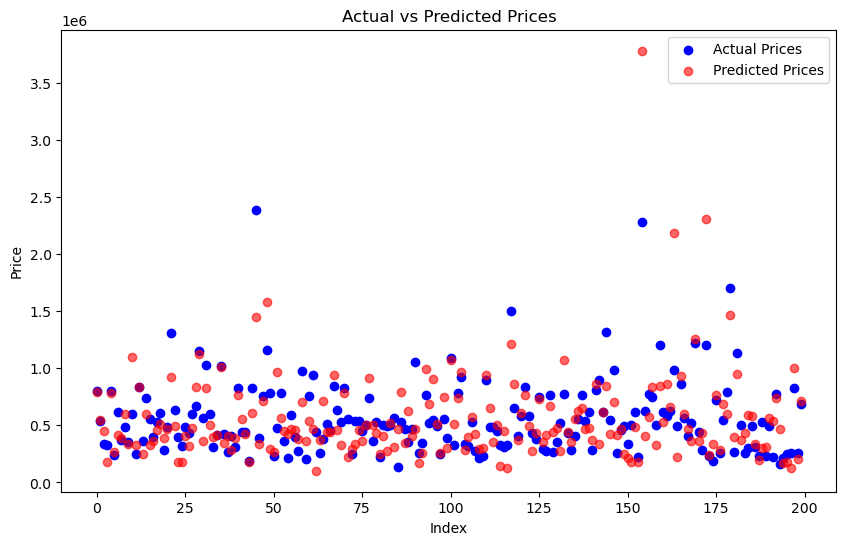

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Prices', alpha=0.6)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()


In [55]:
# Add error column to the predictions DataFrame
predictions['Error'] = predictions['Actual'] - predictions['Predicted']
print(predictions.head(10))  # Shows the first 10 rows of actual vs predicted prices with errors


     Actual      Predicted          Error
0  800866.0  794654.268469    6211.731531
1  535000.0  542617.220591   -7617.220591
2  339950.0  449195.633221 -109245.633221
3  325000.0  180912.657734  144087.342266
4  800000.0  781255.093245   18744.906755
5  242500.0  263698.817687  -21198.817687
6  615000.0  415022.050119  199977.949881
7  372500.0  393435.248853  -20935.248853
8  488000.0  599410.567900 -111410.567900
9  353000.0  333078.842998   19921.157002
